<table class="table table-bordered">
<tr>
<th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Distributed Data Pipelines</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

Learning Objectives:
- Design PySpark Based Machine Learning
- Execute PySpark Syntax Correctly
- Evaluate and Select Final Model based on Metrics

You will be **graded on the use of PySpark**, so usage of **Pandas itself should be avoided as much as possible**, especially if a particular native method or function is already available in PySpark. **Penalties will be imposed in such cases.**

In [1]:
import findspark
findspark.init()

from pyspark.sql import*
from pyspark.sql.functions import *
from pyspark.ml.feature import *
from pyspark.sql.types import *
from pyspark.ml import *

spark = SparkSession.builder.appName('DDPASG1').getOrCreate()

# Table Of Contents

## 1. [Problem Statement Formulation](#part1)

## 2. [Exploratory Data Analysis and Data Cleansing](#part2)

## 3. [Data Wrangling and Transformation](#part3)

## 4. [Machine Learning Modelling](#part4)

## 5. [Model Evaluation and Selection](#part5)

## 6. [Summary and Further Improvements](#part6)

### Step 1: Problem Statement Formulation<a id="part1"></a>

In [2]:
# load and explore data

ppty_data=spark.read.csv('./data/thailand_ppty_asg1.csv', header=True, inferSchema=True)

In [3]:
ppty_data.printSchema()

root
 |-- sub_property_type: string (nullable = true)
 |-- living_space: double (nullable = true)
 |-- bathroom_number: integer (nullable = true)
 |-- currency: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- property_id: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- floor_level: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- built_year: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- premium: integer (nullable = true)
 |-- bedroom_number: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- listing_label: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- tenure: string (nullable = true)
 |-- price: integer (nullable = true)



In [4]:
ppty_data.show(truncate = False)

+-----------------+------------+---------------+--------+--------------+-----------+---------+-----------+-------+----------+-----------+-------+--------------+---------------------------------------------------------+-------------+-----------+--------+--------+
|sub_property_type|living_space|bathroom_number|currency|property_type |property_id|city     |floor_level|state  |built_year|latitude   |premium|bedroom_number|address                                                  |listing_label|longitude  |tenure  |price   |
+-----------------+------------+---------------+--------+--------------+-----------+---------+-----------+-------+----------+-----------+-------+--------------+---------------------------------------------------------+-------------+-----------+--------+--------+
|For Sale         |76.86       |2              |Baht    |Condo         |9942777    |Dusit    |6          |Bangkok|2010      |13.79101869|0      |2             |Samsen Road, Dusit, Dusit, Bangkok                 

In [5]:
ppty_data.count()  

41360

In [6]:
# extracting number of rows from the Dataframe
row = ppty_data.count()

# extracting number of columns from the Dataframe
col = len(ppty_data.columns)

# printing
print(f'Dimension of the Dataframe is: {(row,col)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {col}')

Dimension of the Dataframe is: (41360, 18)
Number of Rows are: 41360
Number of Columns are: 18


## Problem Statement Formulation

### Load Explore, and Understand the Data
To explore and understand the dataset, after loading my dataset ‘ppty_data’, I got the schema and a display of the entire contents in ‘ppty_data’ as well as the dimensions of the data. This information gives me an understanding of the data and its structure and values giving me an overview of my dataset.


### Value-Based Problem Statement:
Housing is a critical need in every society, with numerous factors contributing to demand and consequently pricing. This assignment is about property pricing in Thailand, one of our Southeast Asian neighbours.

A customized version of various Thailand property transactions has been created for this assignment. Using PySpark, the aim is to build a Price Prediction Model to forecast the rental prices of any given Thailand Property transaction. 


### Step 2: Exploratory Data Analysis and Data Cleansing<a id="part2"></a>

####  Categorical Data

In [7]:
ppty_data.groupBy('state').agg(count('state').alias('state_count')).orderBy(desc('state_count')).show()

+-------------------+-----------+
|              state|state_count|
+-------------------+-----------+
|            Bangkok|      36544|
|       Samut Prakan|       1819|
|         Nonthaburi|       1516|
|          Chon Buri|        629|
|         Chiang Mai|        310|
|       Pathum Thani|        190|
|Prachuap Khiri Khan|         90|
|             Phuket|         88|
|            Pattaya|         49|
|        Phetchaburi|         48|
|      Nakhon Pathom|         38|
|       Samut Sakhon|         21|
|             Rayong|          7|
|           Songkhla|          4|
|          Khon Kaen|          3|
|  Nakhon Ratchasima|          3|
|        Surat Thani|          1|
+-------------------+-----------+



In [8]:
ppty_data.groupBy('city').agg(count('city').alias('city_count')).orderBy(desc('city_count')).show()

+-------------------+----------+
|               city|city_count|
+-------------------+----------+
|        Huai Khwang|      4697|
|           Watthana|      3834|
|          Chatuchak|      3043|
|        Khlong Toei|      2914|
|       Phra Khanong|      1901|
|        Ratchathewi|      1610|
|         Suan Luang|      1464|
|            Bang Na|      1294|
|           Bang Sue|      1288|
|         Khlong San|      1222|
|          Din Daeng|      1153|
|          Bang Kapi|      1132|
|Muang Samut Prakarn|      1104|
|          Thon Buri|      1045|
|           Yan Nawa|      1040|
|             Sathon|      1005|
|   Muang Nonthaburi|       964|
|           Bang Rak|       889|
|         Phaya Thai|       772|
|         Pathum Wan|       594|
+-------------------+----------+
only showing top 20 rows



In [9]:
ppty_data.groupBy('sub_property_type').agg(count('sub_property_type').alias('sub_property_type_count')).show()

+-----------------+-----------------------+
|sub_property_type|sub_property_type_count|
+-----------------+-----------------------+
|         For Sale|                  41126|
|    Option To Buy|                    234|
+-----------------+-----------------------+



In [10]:
ppty_data.groupBy('property_type').agg(count('property_type').alias('property_type_count')).orderBy(desc('property_type_count')).show()

+--------------+-------------------+
| property_type|property_type_count|
+--------------+-------------------+
|         Condo|              39870|
|Detached House|                835|
|     Townhouse|                651|
|     Apartment|                  4|
+--------------+-------------------+



In [11]:
ppty_data.groupBy('listing_label').agg(count('listing_label').alias('listing_label_count')).orderBy(desc('listing_label_count')).show()

+-------------+-------------------+
|listing_label|listing_label_count|
+-------------+-------------------+
|    CORPORATE|              38172|
|       NORMAL|               3170|
|        OWNER|                 18|
+-------------+-------------------+



In [12]:
ppty_data.groupBy('tenure').agg(count('tenure').alias('tenure_count')).orderBy(desc('tenure_count')).show()

+-----------------+------------+
|           tenure|tenure_count|
+-----------------+------------+
|         Freehold|       41218|
|        Leasehold|         135|
|30-year Leasehold|           7|
+-----------------+------------+



In [13]:
ppty_data.groupBy('currency').agg(count('currency').alias('currency_count')).orderBy(desc('currency_count')).show()

+--------+--------------+
|currency|currency_count|
+--------+--------------+
|    Baht|         41360|
+--------+--------------+



####  Numerical Data

In [14]:
ppty_data.describe('living_space','bathroom_number','floor_level','built_year','premium','bedroom_number').show(truncate = False)

+-------+-----------------+------------------+------------------+------------------+--------------------+------------------+
|summary|living_space     |bathroom_number   |floor_level       |built_year        |premium             |bedroom_number    |
+-------+-----------------+------------------+------------------+------------------+--------------------+------------------+
|count  |41310            |41360             |41360             |41360             |41360               |41360             |
|mean   |131.2979258121521|1.2972678916827853|15504.037693423597|2014.3418036750484|0.014192456479690523|1.2618471953578336|
|stddev |6444.044353131916|0.6902640101287385|3089664.398453431 |4.0109587829731295|0.11828511715924905 |0.7700069673785545|
|min    |16.0             |0                 |0                 |1985              |0                   |0                 |
|max    |989898.0         |9                 |628266569         |2025              |1                   |11                |


In [15]:
ppty_data.describe('price').show(truncate = False)

+-------+-------------------+
|summary|price              |
+-------+-------------------+
|count  |41360              |
|mean   |6610496.336532882  |
|stddev |1.511423482610068E7|
|min    |0                  |
|max    |1396396324         |
+-------+-------------------+



In [16]:
ppty_data.select('living_space').show(5)

+------------+
|living_space|
+------------+
|       76.86|
|        42.0|
|       123.0|
|       180.0|
|       35.35|
+------------+
only showing top 5 rows



In [17]:
'built_year','premium','bedroom_number','price'

('built_year', 'premium', 'bedroom_number', 'price')

In [18]:
ppty_data.groupBy('bathroom_number').agg(count('bathroom_number').alias('bathroom_number_count')).orderBy(desc('bathroom_number_count')).show()

+---------------+---------------------+
|bathroom_number|bathroom_number_count|
+---------------+---------------------+
|              1|                32531|
|              2|                 6569|
|              3|                 1381|
|              4|                  509|
|              5|                  236|
|              6|                   79|
|              0|                   35|
|              7|                   13|
|              9|                    6|
|              8|                    1|
+---------------+---------------------+



In [19]:
ppty_data.groupBy('floor_level').agg(count('floor_level').alias('floor_level_count')).orderBy(desc('floor_level_count')).show(500)

+-----------+-----------------+
|floor_level|floor_level_count|
+-----------+-----------------+
|          2|             3615|
|          8|             3399|
|          3|             2001|
|          7|             1889|
|          6|             1838|
|          4|             1686|
|          5|             1640|
|         12|             1438|
|          1|             1308|
|         10|             1048|
|         27|              961|
|         20|              950|
|         14|              913|
|         11|              896|
|          9|              853|
|         21|              796|
|         15|              792|
|         23|              776|
|         30|              723|
|         28|              718|
|         24|              716|
|         17|              707|
|         25|              683|
|         16|              664|
|         19|              664|
|         18|              647|
|         22|              646|
|         26|              587|
|       

In [20]:
ranges = [
    (0, 50),
    (51, 100),
    (101, 150),
    (151,200),
    (201,1000000000)
]
copy = ppty_data
# Create a new column 'floor_level_range' based on the specified ranges
for start, end in ranges:
    copy = copy.withColumn(
        f"floor_level_{start}_{end}",
        expr(f"CASE WHEN floor_level BETWEEN {start} AND {end} THEN 'floor_level_{start}_{end}' ELSE NULL END")
    )

# Combine the range columns into a single column 'floor_level_range'
floor_range = copy.withColumn("floor_level_range", expr("CONCAT_WS(',', " + ", ".join([f"floor_level_{start}_{end}" for start, end in ranges]) + ")"))

# Group by the 'floor_level_range' and count
result = floor_range.groupBy("floor_level_range").count().orderBy("floor_level_range")

# Show the result
result.show(truncate=False) 

+--------------------------+-----+
|floor_level_range         |count|
+--------------------------+-----+
|floor_level_0_50          |40306|
|floor_level_101_150       |59   |
|floor_level_151_200       |5    |
|floor_level_201_1000000000|205  |
|floor_level_51_100        |785  |
+--------------------------+-----+



In [21]:
ppty_data.groupBy('built_year').agg(count('built_year').alias('built_year_count')).orderBy(desc('built_year_count')).show(250)

+----------+----------------+
|built_year|built_year_count|
+----------+----------------+
|      2014|            5479|
|      2013|            4807|
|      2015|            4358|
|      2017|            3873|
|      2018|            3488|
|      2012|            3273|
|      2016|            3170|
|      2010|            2277|
|      2019|            2153|
|      2020|            1837|
|      2009|            1718|
|      2011|            1452|
|      2021|             840|
|      2007|             631|
|      2022|             505|
|      2008|             480|
|      2006|             239|
|      2005|             133|
|      1994|             108|
|      1995|              79|
|      1996|              59|
|      1998|              56|
|      1997|              53|
|      2004|              49|
|      1999|              49|
|      2002|              45|
|      1993|              44|
|      2001|              34|
|      2023|              26|
|      2000|              10|
|      199

In [22]:
ppty_data.groupBy('premium').agg(count('premium').alias('premium_count')).orderBy(desc('premium_count')).show()

+-------+-------------+
|premium|premium_count|
+-------+-------------+
|      0|        40773|
|      1|          587|
+-------+-------------+



In [23]:
ppty_data.groupBy('bedroom_number').agg(count('bedroom_number').alias('bedroom_number_count')).orderBy(desc('bedroom_number_count')).show()

+--------------+--------------------+
|bedroom_number|bedroom_number_count|
+--------------+--------------------+
|             1|               27273|
|             2|                8148|
|             0|                3378|
|             3|                1879|
|             4|                 514|
|             5|                 126|
|             6|                  26|
|            10|                   7|
|             7|                   5|
|             9|                   2|
|            11|                   1|
|             8|                   1|
+--------------+--------------------+



In [24]:
from pyspark.sql.functions import col
for column in ppty_data.columns:
    null_count = ppty_data.filter(col(column).isNull()).count()
    print(f"Null values in '{column}': {null_count}")

Null values in 'sub_property_type': 0
Null values in 'living_space': 50
Null values in 'bathroom_number': 0
Null values in 'currency': 0
Null values in 'property_type': 0
Null values in 'property_id': 0
Null values in 'city': 0
Null values in 'floor_level': 0
Null values in 'state': 0
Null values in 'built_year': 0
Null values in 'latitude': 0
Null values in 'premium': 0
Null values in 'bedroom_number': 0
Null values in 'address': 0
Null values in 'listing_label': 0
Null values in 'longitude': 0
Null values in 'tenure': 0
Null values in 'price': 0


#### NaN Treatment

In [25]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
ppty_data.filter(col("living_space").isNull()).show()

+-----------------+------------+---------------+--------+-------------+-----------+-----------+-----------+-------+----------+-----------+-------+--------------+--------------------+-------------+-----------+--------+--------+
|sub_property_type|living_space|bathroom_number|currency|property_type|property_id|       city|floor_level|  state|built_year|   latitude|premium|bedroom_number|             address|listing_label|  longitude|  tenure|   price|
+-----------------+------------+---------------+--------+-------------+-----------+-----------+-----------+-------+----------+-----------+-------+--------------+--------------------+-------------+-----------+--------+--------+
|         For Sale|        null|              1|    Baht|        Condo|    6462781|Khlong Toei|         14|Bangkok|      2018|  13.725635|      0|             2|68 Sukhumvit 24 A...|    CORPORATE| 100.566196|Freehold|13000000|
|         For Sale|        null|              1|    Baht|        Condo|    7132380|Khlong To

In [26]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when


median_living_space_khlong_toei = ppty_data.filter(col('city') == 'Khlong Toei').approxQuantile('living_space', [0.5], 0.01)[0]

# Impute missing values with the median
ppty_data = ppty_data.withColumn(
    'living_space',
    when((col('living_space').isNull()) & (col('city') == 'Khlong Toei'), median_living_space_khlong_toei)
    .otherwise(col('living_space'))
)


In [27]:
from pyspark.sql.functions import col
for column in ppty_data.columns:
    null_count = ppty_data.filter(col(column).isNull()).count()
    print(f"Null values in '{column}': {null_count}")

Null values in 'sub_property_type': 0
Null values in 'living_space': 0
Null values in 'bathroom_number': 0
Null values in 'currency': 0
Null values in 'property_type': 0
Null values in 'property_id': 0
Null values in 'city': 0
Null values in 'floor_level': 0
Null values in 'state': 0
Null values in 'built_year': 0
Null values in 'latitude': 0
Null values in 'premium': 0
Null values in 'bedroom_number': 0
Null values in 'address': 0
Null values in 'listing_label': 0
Null values in 'longitude': 0
Null values in 'tenure': 0
Null values in 'price': 0


#### Duplicates

In [28]:
# Get the count before removing duplicates
original_count = ppty_data.count()

# Remove duplicates based on "property_id"
ppty_data = ppty_data.dropDuplicates(["property_id"])

# Get the count after removing duplicates
distinct_count = ppty_data.count()

# Calculate the count of duplicated data removed
duplicated_count = original_count - distinct_count

# Print the count of duplicated data removed
print(f"Count of duplicated data removed: {duplicated_count}")

# Show the resulting DataFrame
# ppty_data.show()

Count of duplicated data removed: 22


In [29]:
# Get the count of rows where 'price' is equal to 0
zero_price_count = ppty_data.filter(ppty_data['price'] == 0).count()

# Print the count
print("Count of rows where price is 0:", zero_price_count)

zero_price_rows = ppty_data.filter(ppty_data['price'] == 0).collect()

# Print or further process the resulting rows
for row in zero_price_rows:
    row

Count of rows where price is 0: 23


#### No price

In [30]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql import functions as F

from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Drop rows where the price is 0
ppty_data = ppty_data.filter(col("price") != 0)


# Get the count of rows where 'price' is equal to 0
zero_price_count = ppty_data.filter(ppty_data['price'] == 0).count()

# Print the count
print("Count of rows where price is 0:", zero_price_count)

zero_price_rows = ppty_data.filter(ppty_data['price'] == 0).collect()

# Print or further process the resulting rows
for row in zero_price_rows:
    row

Count of rows where price is 0: 0


## Exploratory Data Analysis and Data Cleansing

In my initial data exploration, I categorized variables into categorical and numerical types. For my categorical variables, I prepared a table to show the count for each unique variable to reveal the distribution of values within each category and to assess the prevalence of specific classes to gain insights into the relative frequencies of different groups in the dataset. 
For numerical variables, I computed descriptive statistics and visualized distributions with tables. Exploring my numerical variables allows me to understand the distribution and characteristics of variables.


### Intresting trends, Anomalies, Potential Error
Through this exploration, potential anomalies and errors were identified. Notable instances include anomalies in the 'living_space' variable, where the minimum value was recorded as 16sqm, and 'built_year,' which indicated years beyond 2023. Furthermore, the 'price' variable exhibited a minimum value of 0, indicating potential discrepancies. 

### Missing value Treatment
To address missing values in the 'living_space' variable, an imputation strategy was employed, utilizing the mean value specific to the city to fill the missing values. 

### Addressing anomalies
Additionally, 22 duplicate entries were identified and subsequently removed from the dataset. Furthermore, given the nature of the predictive task involving 'price,' rows with a 'price' value of 0 were dropped, aligning to refine the dataset for improved modelling accuracy.

This thorough data exploration not only enhanced the quality of the dataset but also laid the foundation for subsequent steps in the data analysis and modelling process.


### Step 3: Data Wrangling and Transformation<a id="part3"></a>

#### Numerical Transformation

In [31]:
cap_value = 70  

# Identify and handle outliers for floor level
ppty_data = ppty_data.withColumn(
    "floor_level",
    expr("CASE WHEN floor_level < 0 THEN 0 "  # Set a lower cap, e.g., 0
         "WHEN floor_level > {} THEN {} ELSE floor_level END"
         .format(cap_value, cap_value))
)

# Show the DataFrame after outlier handling
ppty_data.show()

+-----------------+------------+---------------+--------+--------------+-----------+----------------+-----------+-------------+----------+-----------+-------+--------------+--------------------+-------------+-----------+--------+--------+
|sub_property_type|living_space|bathroom_number|currency| property_type|property_id|            city|floor_level|        state|built_year|   latitude|premium|bedroom_number|             address|listing_label|  longitude|  tenure|   price|
+-----------------+------------+---------------+--------+--------------+-----------+----------------+-----------+-------------+----------+-----------+-------+--------------+--------------------+-------------+-----------+--------+--------+
|         For Sale|        28.0|              1|    Baht|         Condo|    1605923|     Huai Khwang|          7|      Bangkok|      2015|  13.783881|      0|             1|- Soi Ratchadaphi...|    CORPORATE| 100.585884|Freehold| 1600000|
|         For Sale|        23.0|            

In [32]:
ppty_data = ppty_data.filter((ppty_data['built_year']<=2023))

In [33]:
quantiles = ppty_data.stat.approxQuantile("price", [0.25, 0.75], 0.01)

# Calculate the IQR for floor_level
lower_q, upper_q = quantiles
iqr = upper_q - lower_q

# Define a threshold for outlier detection
threshold = 100

ppty_data = ppty_data.withColumn("price", when(col("price") > upper_q + threshold * iqr, upper_q + threshold * iqr).otherwise(col("price")))

In [34]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when

columns_to_winsorize = ['living_space']

# Define winsorization limits (e.g., 5th and 95th percentiles)
lower_limit = 0.05
upper_limit = 0.95

# Apply winsorization to specified columns
for column in columns_to_winsorize:
    # Calculate quantiles for winsorization
    quantiles = ppty_data.approxQuantile(column, [lower_limit, upper_limit], 0.01)

    # Extract lower and upper bounds
    lower_bound, upper_bound = quantiles

    # Apply winsorization to the specified column
    ppty_data = ppty_data.withColumn(
        f"winsorized_{column}",
        when(col(column) < lower_bound, lower_bound)
        .when(col(column) > upper_bound, upper_bound)
        .otherwise(col(column))
    )

In [35]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Bucketizer
from pyspark.sql.functions import col

# Assuming 'ppty_data' is your DataFrame
# Replace these with your actual DataFrame and column names

columns_to_bin = ['floor_level','bathroom_number', 'bedroom_number']

# Ensure columns to bin are of type double or float
for col_name in columns_to_bin:
    ppty_data = ppty_data.withColumn(col_name, col(col_name).cast('double'))

# Define the number of buckets (bins)
num_buckets = 8

# Find the minimum and maximum values in each column
column_min_values = [ppty_data.agg({col_name: 'min'}).collect()[0][0] for col_name in columns_to_bin]
column_max_values = [ppty_data.agg({col_name: 'max'}).collect()[0][0] for col_name in columns_to_bin]

# Define the bin edges based on the min and max values
bin_edges = [
    [min_value + i * (max_value - min_value) / num_buckets for i in range(num_buckets + 1)]
    for min_value, max_value in zip(column_min_values, column_max_values)
]

# Create a Bucketizer instance for each column
bucketizers = [
    Bucketizer(splits=edges, inputCol=col_name, outputCol=f"{col_name}_bucket")
    for col_name, edges in zip(columns_to_bin, bin_edges)
]

# Apply the Bucketizer to the DataFrame
for bucketizer in bucketizers:
    ppty_data = bucketizer.transform(ppty_data)

# Show the resulting DataFrame
ppty_data.select(columns_to_bin + [f"{col_name}_bucket" for col_name in columns_to_bin]).show()


+-----------+---------------+--------------+------------------+----------------------+---------------------+
|floor_level|bathroom_number|bedroom_number|floor_level_bucket|bathroom_number_bucket|bedroom_number_bucket|
+-----------+---------------+--------------+------------------+----------------------+---------------------+
|       15.0|            1.0|           1.0|               1.0|                   0.0|                  0.0|
|       14.0|            1.0|           1.0|               1.0|                   0.0|                  0.0|
|       53.0|            2.0|           2.0|               6.0|                   1.0|                  1.0|
|        6.0|            1.0|           1.0|               0.0|                   0.0|                  0.0|
|       12.0|            2.0|           2.0|               1.0|                   1.0|                  1.0|
|        4.0|            1.0|           1.0|               0.0|                   0.0|                  0.0|
|        2.0|      

In [36]:
columns_to_bin = ['built_year']

# Ensure columns to bin are of type double or float
for col_name in columns_to_bin:
    ppty_data = ppty_data.withColumn(col_name, col(col_name).cast('double'))

# Define the number of buckets (bins)
num_buckets = 10

# Find the minimum and maximum values in each column
column_min_values = [ppty_data.agg({col_name: 'min'}).collect()[0][0] for col_name in columns_to_bin]
column_max_values = [ppty_data.agg({col_name: 'max'}).collect()[0][0] for col_name in columns_to_bin]

# Define the bin edges based on the min and max values
bin_edges = [
    [min_value + i * (max_value - min_value) / num_buckets for i in range(num_buckets + 1)]
    for min_value, max_value in zip(column_min_values, column_max_values)
]

# Create a Bucketizer instance for each column
bucketizers = [
    Bucketizer(splits=edges, inputCol=col_name, outputCol=f"{col_name}_bucket")
    for col_name, edges in zip(columns_to_bin, bin_edges)
]

# Apply the Bucketizer to the DataFrame
for bucketizer in bucketizers:
    ppty_data = bucketizer.transform(ppty_data)

# Show the resulting DataFrame
ppty_data.select(columns_to_bin + [f"{col_name}_bucket" for col_name in columns_to_bin]).show()

+----------+-----------------+
|built_year|built_year_bucket|
+----------+-----------------+
|    2018.0|              8.0|
|    2013.0|              7.0|
|    2012.0|              7.0|
|    2012.0|              7.0|
|    2013.0|              7.0|
|    2012.0|              7.0|
|    2012.0|              7.0|
|    2008.0|              6.0|
|    2012.0|              7.0|
|    2014.0|              7.0|
|    2015.0|              7.0|
|    2014.0|              7.0|
|    2022.0|              9.0|
|    2013.0|              7.0|
|    2018.0|              8.0|
|    2021.0|              9.0|
|    2015.0|              7.0|
|    2017.0|              8.0|
|    2020.0|              9.0|
|    2019.0|              8.0|
+----------+-----------------+
only showing top 20 rows



In [37]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sqrt

numerical_columns = ['winsorized_living_space']

# Apply square root transformation to each numerical column
for column in numerical_columns:
    # Create a new column with the square root transformation
    column_name = 'sqrt_' + column
    ppty_data = ppty_data.withColumn(column_name, sqrt(col(column)))

#### Categorical Transformation

In [38]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.sql import SparkSession

categorical_columns = ["state","sub_property_type", "property_type","city","listing_label","tenure","address"]

# Create stages for StringIndexer and OneHotEncoder for each categorical column
stages = []
for col in categorical_columns:
    indexer = StringIndexer(inputCol=col, outputCol=col+"_index")
    encoder = OneHotEncoder(inputCol=col+"_index", outputCol=col+"_vec")
    stages += [indexer, encoder]

# Create a pipeline with all the stages
pipeline = Pipeline(stages=stages)

# Fit and transform the data
model = pipeline.fit(ppty_data)
ppty_data = model.transform(ppty_data)

#### Dropping Columns

In [39]:
ppty_data = ppty_data.drop("sub_property_type","address", "property_type","city","state","listing_label","tenure","currency","living_space","bathroom_number","property_id","floor_level","built_year","bedroom_number","winsorized_living_space")

In [40]:
ppty_data.show(10)

+-----------+-------+-----------+---------+------------------+----------------------+---------------------+-----------------+----------------------------+-----------+---------------+-----------------------+---------------------+-------------------+-----------------+----------+---------------+-------------------+-----------------+------------+-------------+-------------+------------------+
|   latitude|premium|  longitude|    price|floor_level_bucket|bathroom_number_bucket|bedroom_number_bucket|built_year_bucket|sqrt_winsorized_living_space|state_index|      state_vec|sub_property_type_index|sub_property_type_vec|property_type_index|property_type_vec|city_index|       city_vec|listing_label_index|listing_label_vec|tenure_index|   tenure_vec|address_index|       address_vec|
+-----------+-------+-----------+---------+------------------+----------------------+---------------------+-----------------+----------------------------+-----------+---------------+-----------------------+----------

## Data Wrangling and Transormation

### Numerical Variables
In the data wrangling and transformation phase, several key transformations were applied to enhance the quality and relevance of the dataset. The 'floor_level' variable underwent a capping operation, limiting its values to a maximum of 70 floors, aligning with the height of the tallest residential building in Thailand. Subsequently, rows with a 'built_year' beyond 2023 were filtered out to ensure the dataset's temporal coherence.

To address missing or anomalous values in the 'price' variable, a multi-step strategy was implemented. Firstly, instances with a 'price' of 0 were replaced with the mean price within their respective cities, fostering a more accurate representation. Following this, outliers in the 'price' variable were capped to mitigate their impact on subsequent analyses.

Further transformations targeted the numerical features of the dataset. 'Living_space' was subjected to winsorization, while 'floor_level', 'bathroom_number', 'bedroom_number', and 'built_year' underwent binning processes. Additionally, a square root transformation was applied to the winsorized 'living_space,' aiming to address non-linear relationships and enhance model performance.

### Categorical Variables
For categorical variables including "state," "sub_property_type," "property_type," "city," "listing_label," "tenure," and "address," a one-hot encoding technique was employed. This conversion ensures the incorporation of categorical information into the model, enhancing its capacity to capture nuances in the data.

These preprocessing steps collectively contribute to a more robust and refined dataset, setting the stage for subsequent data analysis and modelling. 


### Step 4: Machine Learning Modelling<a id="part4"></a>

#### Model 1

In [41]:
# how to we train or test our models?

In [42]:
# use code to show number of rows and columns,
# as well as a sample of 10 rows before heading into Machine Learning Modelling

In [43]:
# extracting number of rows from the Dataframe
row = ppty_data.count()

# extracting number of columns from the Dataframe
col = len(ppty_data.columns)

# printing
print(f'Dimension of the Dataframe is: {(row,col)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {col}\n')

Dimension of the Dataframe is: (41308, 23)
Number of Rows are: 41308
Number of Columns are: 23



In [44]:
(train, test) = ppty_data.randomSplit([0.8, 0.2], seed=42)

In [45]:
# extracting number of rows from the Dataframe
row = train.count()

# extracting number of columns from the Dataframe
col = len(train.columns)

# printing
print(f'Dimension of the train is: {(row,col)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {col}\n')

# extracting number of rows from the Dataframe
row = test.count()

# extracting number of columns from the Dataframe
col = len(test.columns)

# printing
print(f'Dimension of the test is: {(row,col)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {col}\n')

Dimension of the train is: (32965, 23)
Number of Rows are: 32965
Number of Columns are: 23

Dimension of the test is: (8343, 23)
Number of Rows are: 8343
Number of Columns are: 23



In [46]:
ppty_data.printSchema()

root
 |-- latitude: double (nullable = true)
 |-- premium: integer (nullable = true)
 |-- longitude: double (nullable = true)
 |-- price: double (nullable = true)
 |-- floor_level_bucket: double (nullable = true)
 |-- bathroom_number_bucket: double (nullable = true)
 |-- bedroom_number_bucket: double (nullable = true)
 |-- built_year_bucket: double (nullable = true)
 |-- sqrt_winsorized_living_space: double (nullable = true)
 |-- state_index: double (nullable = false)
 |-- state_vec: vector (nullable = true)
 |-- sub_property_type_index: double (nullable = false)
 |-- sub_property_type_vec: vector (nullable = true)
 |-- property_type_index: double (nullable = false)
 |-- property_type_vec: vector (nullable = true)
 |-- city_index: double (nullable = false)
 |-- city_vec: vector (nullable = true)
 |-- listing_label_index: double (nullable = false)
 |-- listing_label_vec: vector (nullable = true)
 |-- tenure_index: double (nullable = false)
 |-- tenure_vec: vector (nullable = true)
 |-- 

In [47]:
from pyspark.ml.feature import VectorAssembler
feature_columns = [col for col in train.columns if col != 'price']
featureassembler=VectorAssembler(inputCols=feature_columns,outputCol="Xcols")

In [48]:
train_vectored = featureassembler.transform(train)

In [49]:
test_vectored = featureassembler.transform(test)

In [50]:
from pyspark.ml.feature import StandardScaler

sScaler = StandardScaler(withMean=True, withStd=True, inputCol="Xcols", outputCol="Xcols_sscaled")

In [51]:
train_sscaled = sScaler.fit(train_vectored).transform(train_vectored)

test_sscaled = sScaler.fit(test_vectored).transform(test_vectored)

In [52]:
train_sscaled.show(5)

+---------+-------+----------+---------+------------------+----------------------+---------------------+-----------------+----------------------------+-----------+--------------+-----------------------+---------------------+-------------------+-----------------+----------+---------------+-------------------+-----------------+------------+-------------+-------------+-------------------+--------------------+--------------------+
| latitude|premium| longitude|    price|floor_level_bucket|bathroom_number_bucket|bedroom_number_bucket|built_year_bucket|sqrt_winsorized_living_space|state_index|     state_vec|sub_property_type_index|sub_property_type_vec|property_type_index|property_type_vec|city_index|       city_vec|listing_label_index|listing_label_vec|tenure_index|   tenure_vec|address_index|        address_vec|               Xcols|       Xcols_sscaled|
+---------+-------+----------+---------+------------------+----------------------+---------------------+-----------------+----------------

In [53]:
train_data = train_sscaled#.select("Xcols_sscaled","price")
# train_data.show(5)

In [54]:
test_data = test_sscaled#.select("Xcols_sscaled","price")
# test_data.show(5)

In [55]:
from pyspark.ml.regression import LinearRegression

regressor=LinearRegression(featuresCol="Xcols_sscaled", labelCol='price')
regressor=regressor.fit(train_data)

In [56]:
type(regressor)

pyspark.ml.regression.LinearRegressionModel

In [57]:
# Coefficients
regressor.coefficients

DenseVector([-63102.0234, -52258.8935, -251591.3806, 269630.4522, 6719784.2763, 508548.1878, 487976.7998, -812668.7024, -51326.6824, 132383.6581, -144029.2859, -147518.8551, 131152.9505, 19202.9129, -36112.6985, 59511.0972, -63773.0542, 93324.7198, -5806.2896, -69256.2433, -149685.7342, 32688.0437, 35963.779, 37578.7992, 53407.798, -106001.1399, 106001.1399, -1646763.5613, -651344.1697, 2204290.019, 1656278.5008, -383675.8985, -311478.5693, 1083068.2278, -165407.642, 840157.3883, -763198.7128, 371266.1323, -483929.8213, -233847.6257, -398098.4929, 30465.7635, -62721.0936, -374747.6448, 19400.8888, -193718.0587, -163177.6727, 177249.833, -140988.3906, 473335.8537, -18194.534, 709236.6417, -136064.4015, -372168.5122, 166749.5784, -168966.4315, -235014.6293, 1038720.49, -99221.2091, -129300.8509, -259146.9855, -201126.261, 19202.9129, 40868.2307, -75344.6636, -99005.3675, -99334.1775, -108368.1142, 39008.8601, -7780.1213, -2616.2631, -90023.3711, -296011.1908, 45626.1965, 9128.3124, -1403

In [58]:
# Intercept
regressor.intercept

6553573.548217737

In [59]:
# first row values of Xcols_sscaled
train_data.take(1)

[Row(latitude=6.250554, premium=0, longitude=102.044653, price=55500000.0, floor_level_bucket=5.0, bathroom_number_bucket=2.0, bedroom_number_bucket=1.0, built_year_bucket=8.0, sqrt_winsorized_living_space=11.180339887498949, state_index=0.0, state_vec=SparseVector(16, {0: 1.0}), sub_property_type_index=0.0, sub_property_type_vec=SparseVector(1, {0: 1.0}), property_type_index=0.0, property_type_vec=SparseVector(3, {0: 1.0}), city_index=9.0, city_vec=SparseVector(88, {9: 1.0}), listing_label_index=0.0, listing_label_vec=SparseVector(2, {0: 1.0}), tenure_index=0.0, tenure_vec=SparseVector(2, {0: 1.0}), address_index=1306.0, address_vec=SparseVector(1683, {1306: 1.0}), Xcols=SparseVector(1810, {0: 6.2506, 2: 102.0447, 3: 5.0, 4: 2.0, 5: 1.0, 6: 8.0, 7: 11.1803, 9: 1.0, 26: 1.0, 28: 1.0, 31: 9.0, 41: 1.0, 121: 1.0, 124: 1.0, 126: 1306.0, 1433: 1.0}), Xcols_sscaled=DenseVector([-13.4516, -0.1216, 7.3555, 2.1747, 2.4932, 1.1021, 0.7503, 2.6551, -0.277, 0.3637, -0.2138, -0.1962, -0.126, -0.08

In [60]:
train_pred_results=regressor.evaluate(train_data)

In [61]:
train_pred_results.predictions.show()

+-----------+-------+-----------+---------+------------------+----------------------+---------------------+-----------------+----------------------------+-----------+--------------+-----------------------+---------------------+-------------------+-----------------+----------+---------------+-------------------+-----------------+------------+-------------+-------------+-------------------+--------------------+--------------------+--------------------+
|   latitude|premium|  longitude|    price|floor_level_bucket|bathroom_number_bucket|bedroom_number_bucket|built_year_bucket|sqrt_winsorized_living_space|state_index|     state_vec|sub_property_type_index|sub_property_type_vec|property_type_index|property_type_vec|city_index|       city_vec|listing_label_index|listing_label_vec|tenure_index|   tenure_vec|address_index|        address_vec|               Xcols|       Xcols_sscaled|          prediction|
+-----------+-------+-----------+---------+------------------+----------------------+-----

In [62]:
test_pred_results=regressor.evaluate(test_data)

In [63]:
test_pred_results.predictions.show()

+-----------+-------+-----------+---------+------------------+----------------------+---------------------+-----------------+----------------------------+-----------+---------------+-----------------------+---------------------+-------------------+-----------------+----------+---------------+-------------------+-----------------+------------+-------------+-------------+-------------------+--------------------+--------------------+--------------------+
|   latitude|premium|  longitude|    price|floor_level_bucket|bathroom_number_bucket|bedroom_number_bucket|built_year_bucket|sqrt_winsorized_living_space|state_index|      state_vec|sub_property_type_index|sub_property_type_vec|property_type_index|property_type_vec|city_index|       city_vec|listing_label_index|listing_label_vec|tenure_index|   tenure_vec|address_index|        address_vec|               Xcols|       Xcols_sscaled|          prediction|
+-----------+-------+-----------+---------+------------------+----------------------+---

In [64]:
train_pred_results.meanAbsoluteError, train_pred_results.meanSquaredError, train_pred_results.r2

(2395191.424347034, 60883295005001.23, 0.6554479504966604)

In [65]:
test_pred_results.meanAbsoluteError, test_pred_results.meanSquaredError, test_pred_results.r2

(2782910.676283789, 72187312565540.19, 0.5907135654696494)

In [66]:
pyspark_two_rows = test_data.limit(2)
pyspark_two_rows.show()

+---------+-------+----------+---------+------------------+----------------------+---------------------+-----------------+----------------------------+-----------+---------------+-----------------------+---------------------+-------------------+-----------------+----------+---------------+-------------------+-----------------+------------+-------------+-------------+-------------------+--------------------+--------------------+
| latitude|premium| longitude|    price|floor_level_bucket|bathroom_number_bucket|bedroom_number_bucket|built_year_bucket|sqrt_winsorized_living_space|state_index|      state_vec|sub_property_type_index|sub_property_type_vec|property_type_index|property_type_vec|city_index|       city_vec|listing_label_index|listing_label_vec|tenure_index|   tenure_vec|address_index|        address_vec|               Xcols|       Xcols_sscaled|
+---------+-------+----------+---------+------------------+----------------------+---------------------+-----------------+--------------

In [67]:
regressor.evaluate(pyspark_two_rows).predictions.show()

+---------+-------+----------+---------+------------------+----------------------+---------------------+-----------------+----------------------------+-----------+---------------+-----------------------+---------------------+-------------------+-----------------+----------+---------------+-------------------+-----------------+------------+-------------+-------------+-------------------+--------------------+--------------------+------------------+
| latitude|premium| longitude|    price|floor_level_bucket|bathroom_number_bucket|bedroom_number_bucket|built_year_bucket|sqrt_winsorized_living_space|state_index|      state_vec|sub_property_type_index|sub_property_type_vec|property_type_index|property_type_vec|city_index|       city_vec|listing_label_index|listing_label_vec|tenure_index|   tenure_vec|address_index|        address_vec|               Xcols|       Xcols_sscaled|        prediction|
+---------+-------+----------+---------+------------------+----------------------+----------------

pyspark_two_rows

In [68]:
# spark.conf.set("spark.sql.repl.eagerEval.enabled",True)
pyspark_two_rows

DataFrame[latitude: double, premium: int, longitude: double, price: double, floor_level_bucket: double, bathroom_number_bucket: double, bedroom_number_bucket: double, built_year_bucket: double, sqrt_winsorized_living_space: double, state_index: double, state_vec: vector, sub_property_type_index: double, sub_property_type_vec: vector, property_type_index: double, property_type_vec: vector, city_index: double, city_vec: vector, listing_label_index: double, listing_label_vec: vector, tenure_index: double, tenure_vec: vector, address_index: double, address_vec: vector, Xcols: vector, Xcols_sscaled: vector]

In [69]:
# spark.conf.set("spark.sql.repl.eagerEval.enabled",False)
pyspark_two_rows

DataFrame[latitude: double, premium: int, longitude: double, price: double, floor_level_bucket: double, bathroom_number_bucket: double, bedroom_number_bucket: double, built_year_bucket: double, sqrt_winsorized_living_space: double, state_index: double, state_vec: vector, sub_property_type_index: double, sub_property_type_vec: vector, property_type_index: double, property_type_vec: vector, city_index: double, city_vec: vector, listing_label_index: double, listing_label_vec: vector, tenure_index: double, tenure_vec: vector, address_index: double, address_vec: vector, Xcols: vector, Xcols_sscaled: vector]

## Machine Learning Modelling

Before i train test split my data. These are the first 10 rows

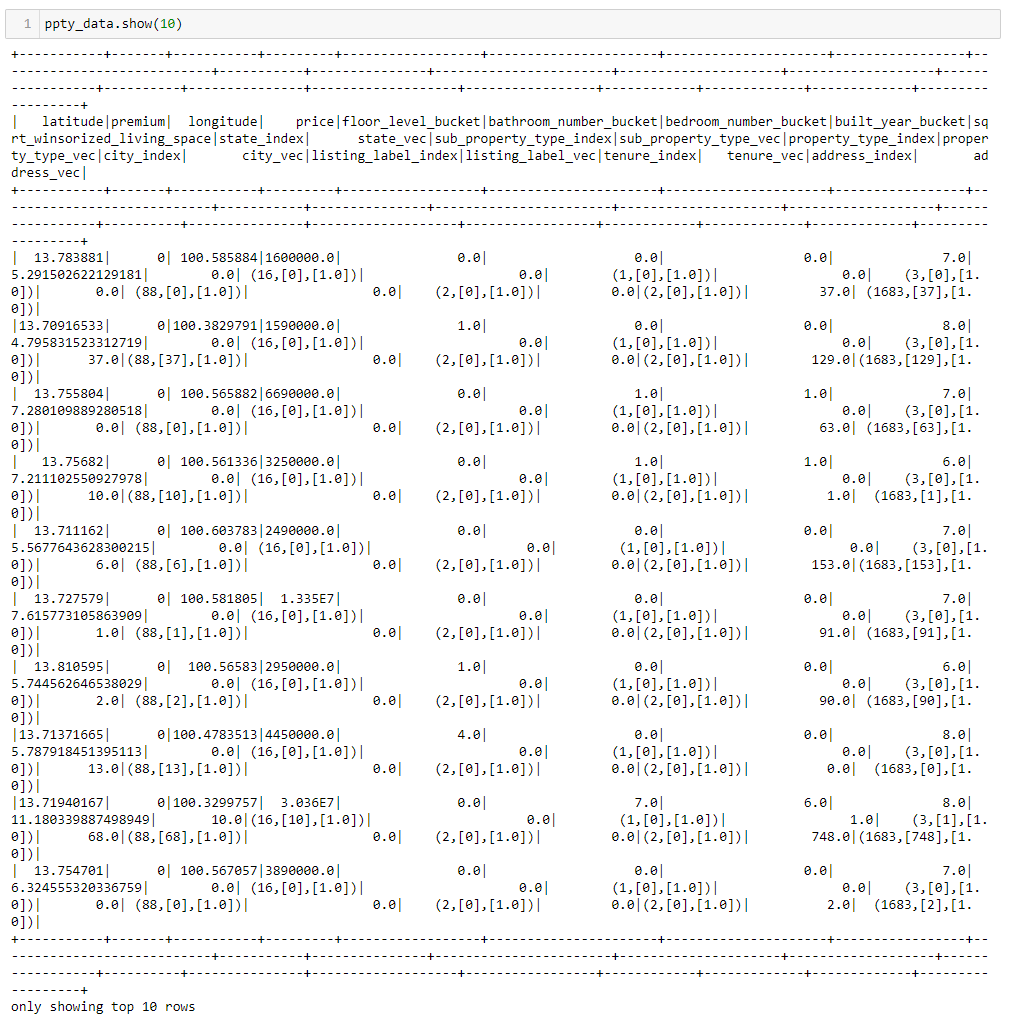

and the number of rows and columns

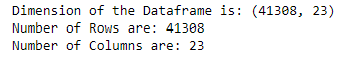

Next, the dataset underwent a pivotal step in the machine learning pipeline — the train-test split. The training set has a size of (32965, 23), while the test set (8343, 23). 

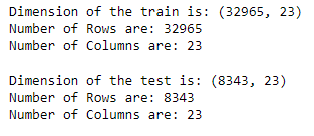

### Build the predictive model
Subsequently, feature engineering steps were implemented to prepare the data for the machine learning models. The process commenced with Vector Assembly, a technique consolidating the various features into a single vector, ready for input into the machine learning algorithm. Following this, Standard Scaling was applied to ensure that all features contribute uniformly to the model by standardizing their scales. This normalization step is crucial for algorithms sensitive to the magnitude of input features, fostering improved convergence and model generalization.

A Linear Regression model was employed to initiate the prediction of property prices. This foundational model provides a baseline understanding of the dataset's predictive capacity. The training phase yielded an R-squared value of 0.6554, indicating that approximately 65.54% of the variance in the target variable could be explained by the model. Meanwhile, the test R-squared of 0.5907 demonstrated the model's ability to generalize well to unseen data, capturing 59.07% of the variance. 
 

### Step 5: Model Evaluation and Selection<a id="part5"></a>

#### Model 2

In [70]:
train_model_2 = train

test_model_2 = test

In [71]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import corr

# Assuming 'train_model_2' is your DataFrame
correlation_train_model_2 = train_model_2.select(
    [corr(col_name, 'price').alias(col_name) 
     for col_name, col_type in train_model_2.dtypes 
     if col_type in ['double', 'float', 'int'] and col_name != 'price']
)

# Show the correlation values
correlation_train_model_2.show()

+--------------------+--------------------+--------------------+-------------------+----------------------+---------------------+-------------------+----------------------------+--------------------+-----------------------+-------------------+--------------------+--------------------+-------------------+--------------------+
|            latitude|             premium|           longitude| floor_level_bucket|bathroom_number_bucket|bedroom_number_bucket|  built_year_bucket|sqrt_winsorized_living_space|         state_index|sub_property_type_index|property_type_index|          city_index| listing_label_index|       tenure_index|       address_index|
+--------------------+--------------------+--------------------+-------------------+----------------------+---------------------+-------------------+----------------------------+--------------------+-----------------------+-------------------+--------------------+--------------------+-------------------+--------------------+
|-0.02482323839359.

In [72]:
from pyspark.sql.functions import col

train_model_2 = train_model_2.withColumn('highcorrelations',
                                 (col('sqrt_winsorized_living_space') * 0.49) +
                                 (col('bathroom_number_bucket') * 0.53) +
                                 (col('floor_level_bucket') * 0.20) +
                                 (col('bedroom_number_bucket') * 0.53) +
                                 (col('tenure_index') * 0.13)
                                )

train_model_2 = train_model_2.withColumn('homepredictor',
                                 (col('sqrt_winsorized_living_space') * 0.49) +
                                 (col('bathroom_number_bucket') * 0.53) +
                                 (col('floor_level_bucket') * 0.20) +
                                 (col('bedroom_number_bucket') * 0.53)
                                )

test_model_2 = test_model_2.withColumn('highcorrelations',
                                 (col('sqrt_winsorized_living_space') * 0.49) +
                                 (col('bathroom_number_bucket') * 0.53) +
                                 (col('floor_level_bucket') * 0.20) +
                                 (col('bedroom_number_bucket') * 0.53) +
                                 (col('tenure_index') * 0.13)
                                )

test_model_2 = test_model_2.withColumn('homepredictor',
                                 (col('sqrt_winsorized_living_space') * 0.49) +
                                 (col('bathroom_number_bucket') * 0.53) +
                                 (col('floor_level_bucket') * 0.20) +
                                 (col('bedroom_number_bucket') * 0.53)
                                )

In [73]:
train_model_2 = train_model_2.withColumn('property',
                                 (col('sub_property_type_index') * 0.020) +
                                 (col('property_type_index') * 0.057) +
                                 (col('tenure_index') * 0.13)
                                )

test_model_2 = test_model_2.withColumn('property',
                                 (col('sub_property_type_index') * 0.020) +
                                 (col('property_type_index') * 0.057) +
                                 (col('tenure_index') * 0.13)
                                )

In [74]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when


# Define the conditions
condition = (
    (col("floor_level_bucket") >= 5) &
    (col("bedroom_number_bucket") >= 3) &
    (col("bathroom_number_bucket") >= 3) 
)

# Create a new binary column based on the conditions
train_model_2 = train_model_2.withColumn("flat_conditions", when(condition, 1).otherwise(0))
test_model_2 = test_model_2.withColumn("flat_conditions", when(condition, 1).otherwise(0))

train_model_2

DataFrame[latitude: double, premium: int, longitude: double, price: double, floor_level_bucket: double, bathroom_number_bucket: double, bedroom_number_bucket: double, built_year_bucket: double, sqrt_winsorized_living_space: double, state_index: double, state_vec: vector, sub_property_type_index: double, sub_property_type_vec: vector, property_type_index: double, property_type_vec: vector, city_index: double, city_vec: vector, listing_label_index: double, listing_label_vec: vector, tenure_index: double, tenure_vec: vector, address_index: double, address_vec: vector, highcorrelations: double, homepredictor: double, property: double, flat_conditions: int]

In [75]:
# extracting number of rows from the Dataframe
row = train_model_2.count()

# extracting number of columns from the Dataframe
col = len(train_model_2.columns)

# printing
print(f'Dimension of the train is: {(row,col)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {col}\n')

# extracting number of rows from the Dataframe
row = test_model_2.count()

# extracting number of columns from the Dataframe
col = len(test_model_2.columns)

# printing
print(f'Dimension of the test is: {(row,col)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {col}\n')

Dimension of the train is: (32965, 27)
Number of Rows are: 32965
Number of Columns are: 27

Dimension of the test is: (8343, 27)
Number of Rows are: 8343
Number of Columns are: 27



In [76]:
from pyspark.ml.feature import VectorAssembler
feature_columns = [col for col in train_model_2.columns if col != 'price']
featureassembler=VectorAssembler(inputCols=feature_columns,outputCol="Xcols")

In [77]:
train_model_2_vectored = featureassembler.transform(train_model_2)

In [78]:
test_model_2_vectored = featureassembler.transform(test_model_2)

In [79]:
from pyspark.ml.feature import StandardScaler

sScaler = StandardScaler(withMean=True, withStd=True, inputCol="Xcols", outputCol="Xcols_sscaled")

In [80]:
train_model_2_sscaled = sScaler.fit(train_model_2_vectored).transform(train_model_2_vectored)

test_model_2_sscaled = sScaler.fit(test_model_2_vectored).transform(test_model_2_vectored)

In [81]:
train_model_2_sscaled.show(5)

+---------+-------+----------+---------+------------------+----------------------+---------------------+-----------------+----------------------------+-----------+--------------+-----------------------+---------------------+-------------------+-----------------+----------+---------------+-------------------+-----------------+------------+-------------+-------------+-------------------+------------------+------------------+--------+---------------+--------------------+--------------------+
| latitude|premium| longitude|    price|floor_level_bucket|bathroom_number_bucket|bedroom_number_bucket|built_year_bucket|sqrt_winsorized_living_space|state_index|     state_vec|sub_property_type_index|sub_property_type_vec|property_type_index|property_type_vec|city_index|       city_vec|listing_label_index|listing_label_vec|tenure_index|   tenure_vec|address_index|        address_vec|  highcorrelations|     homepredictor|property|flat_conditions|               Xcols|       Xcols_sscaled|
+---------+-

In [82]:
train_model_2_data = train_model_2_sscaled.select("Xcols_sscaled","price")
train_model_2_data.show(5)

+--------------------+---------+
|       Xcols_sscaled|    price|
+--------------------+---------+
|[-13.451591573564...|   5.55E7|
|[-2.0344013779566...|2290000.0|
|[-1.5766430861075...|6090000.0|
|[-1.4933284239433...|4800000.0|
|[-1.4673751636465...|3200000.0|
+--------------------+---------+
only showing top 5 rows



In [83]:
test_model_2_data = test_model_2_sscaled.select("Xcols_sscaled","price")
test_model_2_data.show(5)

+--------------------+---------+
|       Xcols_sscaled|    price|
+--------------------+---------+
|[-1.8979329793434...|2700000.0|
|[-1.4119436122098...|5026130.0|
|[-0.2673728028957...|1600000.0|
|[-0.1912066629079...|3465000.0|
|[-0.1676551891984...|1550000.0|
+--------------------+---------+
only showing top 5 rows



In [84]:
from pyspark.ml.regression import LinearRegression

regressor=LinearRegression(featuresCol="Xcols_sscaled", labelCol='price')
regressor=regressor.fit(train_model_2_data)

In [85]:
type(regressor)

pyspark.ml.regression.LinearRegressionModel

In [86]:
# Coefficients
regressor.coefficients

DenseVector([2737.4913, -102482.5715, -272345.919, -158797.4818, 5684464.128, -65368.765, 604286.8142, -931795.6328, -64901.2741, 132114.7594, -118495.5578, -150200.0712, 117464.2315, -12387.3526, -35238.3196, 42876.3032, -46894.0546, 88984.9477, -662.1185, -70659.1951, -157152.6803, 31109.7441, 34601.602, 34820.7217, 49186.2713, -49279.8062, 49279.8062, -596781.7508, -910700.732, 1911562.9231, 1097137.3191, -389801.355, -340073.2714, 987474.6181, -166400.537, 818043.8825, -560067.3963, 334889.4045, -438954.4351, -231888.137, -341307.5131, 24187.9648, -87037.3479, -376110.6537, 41874.46, -182595.7892, -195556.6529, 144202.6191, -140958.7498, 442541.3418, -39218.9474, 688778.6143, -109692.5766, -372210.5712, 147147.3255, -156408.9058, -220828.351, 1153989.8873, -108688.3155, -128710.3448, -237395.6435, -185777.1077, -12387.3526, 30375.8517, -76383.1366, -93306.4304, -103692.6551, -110877.5757, 37137.7286, -8676.6355, -2127.622, -65122.1548, -316267.6841, 40552.8823, 5000.5272, -5241.796

In [87]:
# Intercept
regressor.intercept

6553573.548217733

In [88]:
# first row values of Xcols_sscaled
train_model_2_data.take(1)

[Row(Xcols_sscaled=DenseVector([-13.4516, -0.1216, 7.3555, 2.1747, 2.4932, 1.1021, 0.7503, 2.6551, -0.277, 0.3637, -0.2138, -0.1962, -0.126, -0.0871, -0.0681, -0.0448, -0.0458, -0.0353, -0.0349, -0.0297, -0.022, -0.0095, -0.0095, -0.0078, -0.0095, -0.0765, 0.0765, -0.1815, 0.1926, -0.1445, -0.1245, -0.1971, -0.3611, -0.3205, -0.2836, -0.276, -0.2196, -0.1994, -0.1914, -0.1802, -0.177, 5.8051, -0.1695, -0.1671, -0.1665, -0.1625, -0.162, -0.1541, -0.1556, -0.1472, -0.1366, -0.1201, -0.1156, -0.1191, -0.1105, -0.1097, -0.1073, -0.1033, -0.1009, -0.0955, -0.0922, -0.0867, -0.0871, -0.086, -0.0825, -0.0779, -0.0806, -0.0718, -0.0707, -0.0687, -0.0617, -0.0589, -0.0568, -0.0538, -0.0502, -0.0514, -0.0455, -0.0423, -0.0423, -0.0366, -0.0366, -0.0378, -0.0321, -0.0353, -0.0349, -0.0344, -0.0331, -0.0326, -0.0331, -0.0335, -0.0326, -0.0258, -0.027, -0.024, -0.0234, -0.022, -0.0234, -0.0213, -0.0199, -0.0146, -0.0174, -0.0174, -0.0156, -0.0146, -0.0123, -0.0078, -0.0095, -0.0095, -0.0095, -0.007

In [89]:
train_model_2_pred_results=regressor.evaluate(train_model_2_data)

In [90]:
test_model_2_pred_results=regressor.evaluate(test_model_2_data)

In [91]:
train_model_2_pred_results.meanAbsoluteError, train_model_2_pred_results.meanSquaredError, train_model_2_pred_results.r2

(2221322.827428985, 52428915593266.57, 0.7032931558744693)

In [92]:
test_model_2_pred_results.meanAbsoluteError, test_model_2_pred_results.meanSquaredError, test_model_2_pred_results.r2

(2655175.313166682, 66666688455377.32, 0.6220143090231567)

In [93]:
pyspark_two_rows = test_model_2_data.limit(2)
pyspark_two_rows.show()

+--------------------+---------+
|       Xcols_sscaled|    price|
+--------------------+---------+
|[-1.8979329793434...|2700000.0|
|[-1.4119436122098...|5026130.0|
+--------------------+---------+



In [94]:
regressor.evaluate(pyspark_two_rows).predictions.show()

+--------------------+---------+------------------+
|       Xcols_sscaled|    price|        prediction|
+--------------------+---------+------------------+
|[-1.8979329793434...|2700000.0|-3414677.948186311|
|[-1.4119436122098...|5026130.0| 4100366.021871125|
+--------------------+---------+------------------+



In [95]:
pyspark_two_rows

DataFrame[Xcols_sscaled: vector, price: double]

In [96]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)
pyspark_two_rows

Xcols_sscaled,price
[-1.8979329793434...,2700000.0
[-1.4119436122098...,5026130.0


In [97]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",False)
pyspark_two_rows

DataFrame[Xcols_sscaled: vector, price: double]

### Model 3

In [98]:
train_model_3 = train_model_2
test_model_3 = test_model_2

In [99]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import corr

# Assuming 'train_model_2' is your DataFrame
correlation_train_model_3 = train_model_3.select(
    [corr(col_name, 'price').alias(col_name) 
     for col_name, col_type in train_model_3.dtypes 
     if col_type in ['double', 'float', 'int'] and col_name != 'price']
)

# Show the correlation values
correlation_train_model_3.show()

+--------------------+--------------------+--------------------+-------------------+----------------------+---------------------+-------------------+----------------------------+--------------------+-----------------------+-------------------+--------------------+--------------------+-------------------+--------------------+------------------+------------------+-------------------+-------------------+
|            latitude|             premium|           longitude| floor_level_bucket|bathroom_number_bucket|bedroom_number_bucket|  built_year_bucket|sqrt_winsorized_living_space|         state_index|sub_property_type_index|property_type_index|          city_index| listing_label_index|       tenure_index|       address_index|  highcorrelations|     homepredictor|           property|    flat_conditions|
+--------------------+--------------------+--------------------+-------------------+----------------------+---------------------+-------------------+----------------------------+------------

In [100]:
columns_to_drop = ['state_index','state_vec','sub_property_type_index','sub_property_type_vec','property_type_index','property_type_vec','city_index','city_vec','listing_label_index','listing_label_vec','tenure_index','tenure_vec',"property"]

# Drop the specified columns
train_model_3 = train_model_3.drop(*columns_to_drop)
test_model_3 = test_model_3.drop(*columns_to_drop)

In [101]:
# from pyspark.ml.feature import PCA, VectorAssembler
# from pyspark.ml.linalg import Vectors
# from pyspark.sql import SparkSession

# # Select the columns you want for PCA
# feature_columns = [col for col in train_model_3.columns if col != 'price']
# assembler = VectorAssembler(
#     inputCols=feature_columns,
#     outputCol="features"
# )
# # Apply PCA
# # assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
# train_model_3 = assembler.transform(train_model_3)

# pca = PCA(k=2, inputCol="features", outputCol="pca_features")
# model = pca.fit(train_model_3)
# train_model_3 = model.transform(train_model_3)


In [102]:
# # Select the columns you want for PCA
# feature_columns = [col for col in test_model_3.columns if col != 'price']
# assembler = VectorAssembler(
#     inputCols=feature_columns,
#     outputCol="features"
# )
# # Apply PCA
# # assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
# test_model_3 = assembler.transform(test_model_3)

# pca = PCA(k=2, inputCol="features", outputCol="pca_features")
# model = pca.fit(test_model_3)
# test_model_3 = model.transform(test_model_3)

In [103]:
# extracting number of rows from the Dataframe
row = train_model_3.count()

# extracting number of columns from the Dataframe
col = len(train_model_3.columns)

# printing
print(f'Dimension of the train is: {(row,col)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {col}\n')

# extracting number of rows from the Dataframe
row = test_model_3.count()

# extracting number of columns from the Dataframe
col = len(test_model_3.columns)

# printing
print(f'Dimension of the test is: {(row,col)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {col}\n')

Dimension of the train is: (32965, 14)
Number of Rows are: 32965
Number of Columns are: 14

Dimension of the test is: (8343, 14)
Number of Rows are: 8343
Number of Columns are: 14



In [104]:
from pyspark.ml.feature import VectorAssembler
feature_columns = [col for col in train_model_3.columns if col != 'price']
featureassembler=VectorAssembler(inputCols=feature_columns,outputCol="Xcols")

In [105]:
train_model_3_vectored = featureassembler.transform(train_model_3)

In [106]:
test_model_3_vectored = featureassembler.transform(test_model_3)

In [107]:
from pyspark.ml.feature import StandardScaler

sScaler = StandardScaler(withMean=True, withStd=True, inputCol="Xcols", outputCol="Xcols_sscaled")

In [108]:
train_model_3_sscaled = sScaler.fit(train_model_3_vectored).transform(train_model_3_vectored)

test_model_3_sscaled = sScaler.fit(test_model_3_vectored).transform(test_model_3_vectored)

In [109]:
train_model_3_sscaled.show(5)

+---------+-------+----------+---------+------------------+----------------------+---------------------+-----------------+----------------------------+-------------+-------------------+------------------+------------------+---------------+--------------------+--------------------+
| latitude|premium| longitude|    price|floor_level_bucket|bathroom_number_bucket|bedroom_number_bucket|built_year_bucket|sqrt_winsorized_living_space|address_index|        address_vec|  highcorrelations|     homepredictor|flat_conditions|               Xcols|       Xcols_sscaled|
+---------+-------+----------+---------+------------------+----------------------+---------------------+-----------------+----------------------------+-------------+-------------------+------------------+------------------+---------------+--------------------+--------------------+
| 6.250554|      0|102.044653|   5.55E7|               5.0|                   2.0|                  1.0|              8.0|          11.180339887498949|   

In [110]:
train_model_3_data = train_model_3_sscaled.select("Xcols_sscaled","price")
train_model_3_data.show(5)

+--------------------+---------+
|       Xcols_sscaled|    price|
+--------------------+---------+
|[-13.451591573564...|   5.55E7|
|[-2.0344013779566...|2290000.0|
|[-1.5766430861075...|6090000.0|
|[-1.4933284239433...|4800000.0|
|[-1.4673751636465...|3200000.0|
+--------------------+---------+
only showing top 5 rows



In [111]:
test_model_3_data = test_model_3_sscaled.select("Xcols_sscaled","price")
test_model_3_data.show(5)

+--------------------+---------+
|       Xcols_sscaled|    price|
+--------------------+---------+
|[-1.8979329793434...|2700000.0|
|[-1.4119436122098...|5026130.0|
|[-0.2673728028957...|1600000.0|
|[-0.1912066629079...|3465000.0|
|[-0.1676551891984...|1550000.0|
+--------------------+---------+
only showing top 5 rows



In [112]:
from pyspark.ml.regression import LinearRegression

regressor=LinearRegression(featuresCol="Xcols_sscaled", labelCol='price')
regressor=regressor.fit(train_model_3_data)

In [113]:
type(regressor)

pyspark.ml.regression.LinearRegressionModel

In [114]:
# Coefficients
regressor.coefficients

DenseVector([33482.204, -117619.9096, -237874.2419, -55450.3919, 5834492.7954, -375580.0352, 115902.4477, -260407.3573, -1988112.7034, -464000.782, -284962.8678, -123509.9084, -269005.2933, -160830.7874, -157524.8797, 1574454.7417, -136760.4627, -99497.8909, 14425.8411, -157104.008, -147080.857, -176320.932, -226107.2444, -191508.9879, -187220.2211, -101448.8029, -175888.3045, -111606.9143, -56665.1914, -175086.2551, -88198.1368, -141429.6703, 620021.8089, -56231.9034, 80319.549, -109042.7914, -95238.1433, 200675.4661, -3012.3279, -30975.3626, 114884.9879, 151355.6153, -264679.3277, -121018.5751, -97813.0382, -142519.5688, -140201.3646, -10395.2361, -123817.3707, -174604.5425, -213040.0013, 505902.4974, -152387.7073, 58633.9866, 856.5091, 618685.6598, -178049.3998, 12382.5053, -130924.2018, 58022.1057, -54193.4084, -23824.819, 56087.8369, -5471.8219, -65524.3735, 142277.8712, -132796.9755, 79148.6541, -124485.3494, -102811.7657, -63818.8188, 129253.1348, -49721.9357, 135116.9836, -5714

In [115]:
# Intercept
regressor.intercept

6553573.548217744

In [116]:
# first row values of Xcols_sscaled
train_model_3_data.take(1)

[Row(Xcols_sscaled=DenseVector([-13.4516, -0.1216, 7.3555, 2.1747, 2.4932, 1.1021, 0.7503, 2.6551, 3.4944, -0.4478, -0.099, -0.0895, -0.0876, -0.0814, -0.0795, -0.0739, -0.0757, -0.0728, -0.0703, -0.0714, -0.0703, -0.0724, -0.0639, -0.0662, -0.0641, -0.0658, -0.0639, -0.0636, -0.0594, -0.0612, -0.0627, -0.0612, -0.0592, -0.0573, -0.0579, -0.054, -0.0546, -0.0554, -0.0552, -0.0573, -0.0538, -0.052, -0.0549, -0.0543, -0.0523, -0.0549, -0.0526, -0.0532, -0.056, -0.0517, -0.0563, -0.0523, -0.052, -0.0523, -0.0523, -0.0484, -0.0496, -0.0487, -0.0505, -0.0484, -0.0496, -0.0493, -0.0481, -0.0484, -0.0493, -0.0465, -0.0481, -0.0461, -0.0461, -0.0474, -0.0478, -0.0487, -0.0487, -0.0487, -0.0471, -0.0474, -0.0471, -0.0465, -0.0444, -0.0455, -0.0451, -0.0474, -0.0461, -0.0451, -0.0451, -0.0444, -0.0461, -0.0441, -0.0465, -0.0465, -0.0451, -0.0448, -0.0455, -0.0455, -0.0465, -0.0444, -0.0465, -0.0461, -0.0434, -0.0451, -0.0455, -0.0448, -0.0413, -0.0455, -0.0441, -0.042, -0.0434, -0.0416, -0.0427,

In [117]:
train_model_3_pred_results=regressor.evaluate(train_model_3_data)

In [118]:
test_model_3_pred_results=regressor.evaluate(test_model_3_data)

In [119]:
train_model_3_pred_results.meanAbsoluteError, train_model_3_pred_results.meanSquaredError, train_model_3_pred_results.r2

(2278216.6204669066, 53246560400621.64, 0.6986659228359682)

In [120]:
test_model_3_pred_results.meanAbsoluteError, test_model_3_pred_results.meanSquaredError, test_model_3_pred_results.r2

(2641342.188090032, 67114287744159.305, 0.6194765179558197)

In [121]:
pyspark_two_rows = test_model_3_data.limit(2)
pyspark_two_rows.show()

+--------------------+---------+
|       Xcols_sscaled|    price|
+--------------------+---------+
|[-1.8979329793434...|2700000.0|
|[-1.4119436122098...|5026130.0|
+--------------------+---------+



In [122]:
regressor.evaluate(pyspark_two_rows).predictions.show()

+--------------------+---------+------------------+
|       Xcols_sscaled|    price|        prediction|
+--------------------+---------+------------------+
|[-1.8979329793434...|2700000.0|-771504.8050935194|
|[-1.4119436122098...|5026130.0| 4285026.130687842|
+--------------------+---------+------------------+



In [123]:
pyspark_two_rows

DataFrame[Xcols_sscaled: vector, price: double]

In [124]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)
pyspark_two_rows

Xcols_sscaled,price
[-1.8979329793434...,2700000.0
[-1.4119436122098...,5026130.0


In [125]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",False)
pyspark_two_rows

DataFrame[Xcols_sscaled: vector, price: double]

#### Further model improvements for model 2

In [126]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator


# Print relevant information for training set
print("\nLinear Regression - Training Set MAE:", train_model_2_pred_results.meanAbsoluteError)
print("Linear Regression - Training Set MSE:", train_model_2_pred_results.meanSquaredError)
print("Linear Regression - Training Set R-squared (R²):", train_model_2_pred_results.r2)

# Print relevant information for test set
print("\nLinear Regression - Test Set MAE:", test_model_2_pred_results.meanAbsoluteError)
print("Linear Regression - Test Set MSE:", test_model_2_pred_results.meanSquaredError)
print("Linear Regression - Test Set R-squared (R²):", test_model_2_pred_results.r2)

# Create a DecisionTreeRegressor
decisiontreeregressor = DecisionTreeRegressor(featuresCol="Xcols_sscaled", labelCol="price")

# Train the model on 'train_model_2_data'
dt_model = decisiontreeregressor.fit(train_model_2_data)

type(decisiontreeregressor)

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Assuming you have already trained the RandomForestRegressor model
forestregressor = RandomForestRegressor(featuresCol="Xcols_sscaled", labelCol='price').setSeed(42)
ft_model = forestregressor.fit(train_model_2_data)


type(forestregressor)


# Make predictions on the training set
train_predictions_dt = dt_model.transform(train_model_2_data)

# Use RegressionEvaluator to obtain evaluation metrics for training set
train_evaluator_mae_dt = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")
train_mae_dt = train_evaluator_mae_dt.evaluate(train_predictions_dt)
train_evaluator_mse_dt = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mse")
train_mse_dt = train_evaluator_mse_dt.evaluate(train_predictions_dt)

# Compute R-squared separately for training set
train_r2_dt = train_predictions_dt.stat.corr("price", "prediction")  



# Make predictions on the test set
test_predictions_dt = dt_model.transform(test_model_2_data)

# Use RegressionEvaluator to obtain evaluation metrics for test set
test_evaluator_mae_dt = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")
test_mae_dt = test_evaluator_mae_dt.evaluate(test_predictions_dt)
test_evaluator_mse_dt = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mse")
test_mse_dt = test_evaluator_mse_dt.evaluate(test_predictions_dt)

# Compute R-squared separately for test set
test_r2_dt = test_predictions_dt.stat.corr("price", "prediction")  

train_model_2_pred_results.meanAbsoluteError, train_model_2_pred_results.meanSquaredError, train_model_2_pred_results.r2


# Print relevant information for training set
print("\nDecision Tree - Training Set MAE:", train_mae_dt)
print("Decision Tree - Training Set MSE:", train_mse_dt)
print("Decision Tree - Training Set R-squared (R²):", train_r2_dt)

# Print relevant information for test set
print("\nDecision Tree - Test Set MAE:", test_mae_dt)
print("Decision Tree - Test Set MSE:", test_mse_dt)
print("Decision Tree - Test Set R-squared (R²):", test_r2_dt)


### Using Random Forest Regressor

from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on the training set
train_predictions = ft_model.transform(train_model_2_data)

# Use RegressionEvaluator to obtain evaluation metrics for training set
train_evaluator_mae = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")
train_mae = train_evaluator_mae.evaluate(train_predictions)
train_evaluator_mse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mse")
train_mse = train_evaluator_mse.evaluate(train_predictions)

# Compute R-squared separately for training set
train_r2 = train_predictions.stat.corr("price", "prediction")  


# Make predictions on the test set
test_predictions = ft_model.transform(test_model_2_data)

# Use RegressionEvaluator to obtain evaluation metrics for test set
test_evaluator_mae = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")
test_mae = test_evaluator_mae.evaluate(test_predictions)
test_evaluator_mse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mse")
test_mse = test_evaluator_mse.evaluate(test_predictions)

# Compute R-squared separately for test set
test_r2 = test_predictions.stat.corr("price", "prediction")  


# Print relevant information for training set
print("\nRandom Forest - Training Set MAE:", train_mae)
print("Random Forest - Training Set MSE:", train_mse)
print("Random Forest - Training Set R-squared (R²):", train_r2)

# Print relevant information for test set
print("\nRandom Forest - Test Set MAE:", test_mae)
print("Random Forest - Test Set MSE:", test_mse)
print("Random Forest - Test Set R-squared (R²):", test_r2)


Linear Regression - Training Set MAE: 2221322.827428985
Linear Regression - Training Set MSE: 52428915593266.57
Linear Regression - Training Set R-squared (R²): 0.7032931558744693

Linear Regression - Test Set MAE: 2655175.313166682
Linear Regression - Test Set MSE: 66666688455377.32
Linear Regression - Test Set R-squared (R²): 0.6220143090231567

Decision Tree - Training Set MAE: 2779620.210571641
Decision Tree - Training Set MSE: 67627645449715.01
Decision Tree - Training Set R-squared (R²): 0.7856718002717037

Decision Tree - Test Set MAE: 2953798.607461377
Decision Tree - Test Set MSE: 99455908510831.47
Decision Tree - Test Set R-squared (R²): 0.696830158821307

Random Forest - Training Set MAE: 2598355.686746887
Random Forest - Training Set MSE: 62624333482092.14
Random Forest - Training Set R-squared (R²): 0.8155487371989021

Random Forest - Test Set MAE: 5871525.975807339
Random Forest - Test Set MSE: 95854585742236.03
Random Forest - Test Set R-squared (R²): 0.7483835192516892

## Model Evaluation and Selection

### Utilize Model Metrics for Evaluation 
To improve my model performance, I created a second model which introduced four new features, elevating the dimensionality of the train-test dataset to (32965, 27) and (8343, 27) respectively. The augmentation of feature space resulted in a notable improvement in model performance, as evidenced by the R-squared values. The training R-squared increased to 0.7033, denoting a 70.33% explanation of the variance, while the test R-squared exhibited a commendable increase to 0.6220, indicating a robust generalization capability.

Next, a third model was conceived to explore the impact of dropping a subset of columns. A strategic removal of 13 columns culminated in a train-test dataset dimensionality of (32965, 14) and (8343, 14). The training R-squared at 0.6987 and the test R-squared at 0.6195.

### Compare Models and Decide on Final Model 
To decide on a final model, I chose the second model as it demonstrated better predictive performance, with higher R-squared values on both the training and test sets, showcasing its ability to capture complex patterns within the data.

To further refine this model, I used a decision tree and a random forest apart from my existing linear regression model. The decision tree model exhibited improved performance on the training set, boasting a lower MAE, and a higher R-square of 0.7717, while the test set R-square was 0.7005. The random forest regressor, however, outperformed both models, achieving a training set with a train R-square of 0.816 and a test R-square of 0.748. In the end, I selected the second model employing the random forest regressor for the final iteration.



### Step 6: Report<a id="part6"></a>

## Summary and Further Improvements

### Summarize your findings
In summary, this comprehensive data analysis and machine learning modelling aimed to predict property prices in Thailand by exploring the dataset, revealing its structure, dimensions, and inherent values. Subsequent steps involved exploratory data analysis, data cleansing, and data wrangling, addressing anomalies, potential errors, and missing values. Transformation techniques, such as winsorization, binning, and one-hot encoding, were strategically applied to refine the dataset for predictive modelling. The machine learning phase witnessed the creation of predictive models, including a Linear Regression, decision tree and random forest models, and subsequent iterations with additional features and feature reduction. The decision-making process favoured a model that struck a balance between complexity and performance, resulting in the selection of my second model utilising the random forest regressor.

### Explain the possible further improvements
Further improvements include continued exploration of advanced modelling techniques, such as ensemble methods or non-linear models, to uncover hidden patterns and enhance predictive accuracy. Additionally, fine-tuning hyperparameters and conducting more in-depth feature engineering might contribute to incremental improvements. Lastly, incorporating external factors that influence property prices through external data could further enrich the predictive capabilities of the model.
